1) Hypothesis or Question

2) Store your data  in dataframe to check your hypothesis/question

3) 2-3 visuals per hypothesis/question,  

4) Apply basic statistics

5) Create a presentation

Hypothesis:
1) There was a rise in Anti-Asian hate crimes during the COVID-19 pandemic. 
   (pull data from 2018; pull data from 2019 - 2020)

2) There was a rise in Anti-Muslim hate crimes post 9/11 (pull data from 2000; pull data from 2002)

3) What is the highest count of hate crime for all time? How has it changed over the last 30 years?


In [77]:
import crime_api
from crime_api import crime_api_key

In [78]:
print(crime_api_key)

cgtxxbzQkX2MoRb9D5Neb3M9gzrpShGUEvfebDhG


In [228]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


#modules for statistics
import math
import statistics
from scipy import stats

In [169]:
#Endpoint Name: 'National level Hate Crime Count Endpoint'
#Endpoint: /api/hatecrime/national/{variable}
#Parameters: BIAS_INCIDENT


base_url_N = "https://api.usa.gov/crime/fbi/sapi/api/hatecrime/national/BIAS_INCIDENT?API_KEY=" + crime_api_key
req_crime_N = requests.get(base_url_N)


#create a json output of the data
json_crime_data_N = req_crime_N.json()
print(json_crime_data_N)

{'ui_type': 'basic_table', 'noun': 'bias', 'category': 'Incident Bias characteristics', 'title': 'Bias (Anti-)', 'short_title': 'Bias', 'ui_restriction': None, 'keys': ['Anti-Other Race/Ethnicity/Ancestry', 'Multiple Bias', 'Anti-Atheism/Agnosticism', 'Anti-Mormon', 'Anti-Other Christian', 'Anti-Male', 'Anti-Buddhist', 'Anti-Sikh', 'Anti-Multiple Races, Group', 'Anti-Native Hawaiian or Other Pacific Islander', 'Anti-Mental Disability', 'Anti-Arab', 'Anti-Heterosexual', 'Anti-Transgender', 'Anti-Asian', 'Anti-Multiple Religions, Group', 'Anti-Hispanic or Latino', 'Anti-American Indian or Alaska Native', 'Anti-Bisexual', 'Anti-Black or African American', 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 'Anti-Jehovahs Witness', 'Anti-Protestant', 'Anti-White', 'Anti-Lesbian (Female)', 'Anti-Physical Disability', 'Anti-Islamic (Muslim)', 'Anti-Hindu', 'Anti-Other Religion', 'Anti-Gay (Male)', 'Anti-Eastern Orthodox (Russian, Greek, Other)', 'Anti-Jewish', 'Anti-Gender Non-Confo

In [182]:
sorted_crime_df_N = df_N.sort_values("data_year", ascending=False)
sorted_crime_df_N.reset_index(drop=True, inplace=True)
sorted_crime_df_N

,value,data_year,month_num,key
0,71,2020,0,Anti-Arab
1,279,2020,0,Anti-Asian
2,76,2020,0,Anti-Other Religion
3,211,2020,0,"Anti-Multiple Races, Group"
4,53,2020,0,Anti-Physical Disability
...,...,...,...,...
1045,1,1991,0,Anti-Bisexual
1046,0,1991,0,Anti-Other Christian
1047,0,1991,0,Anti-Gender Non-Conforming
1048,86,1991,0,"Anti-Multiple Races, Group"


In [193]:
df_N = pd.DataFrame(json_crime_data_N['data'])
sorted_crime_df_N = df_N.sort_values("data_year", ascending=False)
#print(sorted_crime_df_N["data_year"].value_counts())

national_crime_2020_df = sorted_crime_df_N.head(35)
national_crime_2020_df.reset_index(drop=True, inplace=True)
national_crime_2020_df

,value,data_year,month_num,key
0,71,2020,0,Anti-Arab
1,279,2020,0,Anti-Asian
2,76,2020,0,Anti-Other Religion
3,211,2020,0,"Anti-Multiple Races, Group"
4,53,2020,0,Anti-Physical Disability
5,9,2020,0,Anti-Jehovahs Witness
6,40,2020,0,"Anti-Multiple Religions, Group"
7,8,2020,0,Anti-Atheism/Agnosticism
8,11,2020,0,Anti-Hindu
9,683,2020,0,Anti-Jewish


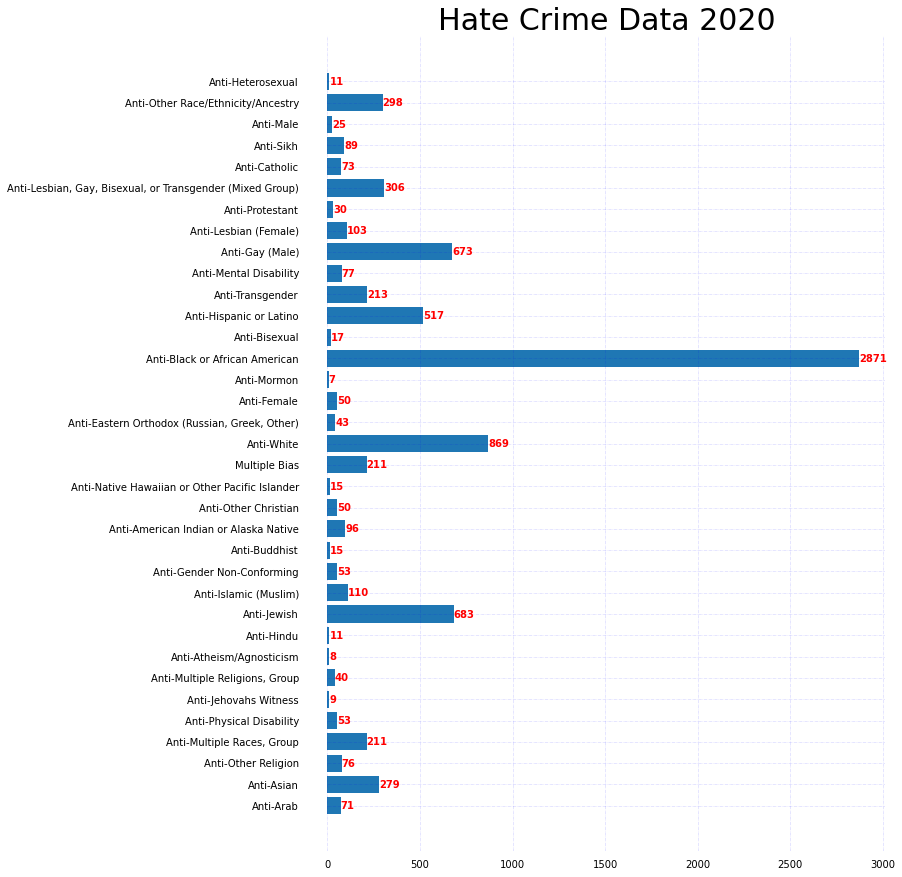

In [385]:
crimes = national_crime_2020_df['key']  #key column is extracted
crime_count = national_crime_2020_df['value'] #value column is extracted


fig, ax = plt.subplots(figsize =(10, 15)) #dimensions for graph size are given : 10:width, 15:height

#ax.barh() is used to make horizontal graphs. This function accepts multiple parameters. 
#Two of which are: left = the x coordinate(s) of the left sides of the bars('crime') &
#y= sequence of y coordinates of the bar('crime_count')

ax.barh(crimes, crime_count)  
 
#Each of the four sides (the border of the graph) from the list are removed/invisible 
#because the spines are set to false. 
for sides in ['top', 'bottom','left', 'right']:
    ax.spines[sides].set_visible(False)
 
#Here I have removed the ticks from both the x and y axis so that the values can show properly. 
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
#Here I have increased the spacing between each axes and its labels as I see fit.
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 25)
 
#the following function--grid()--allows me to customize how I want my gridlines to be. 
#b=true: means gird is on, color of gridlines set to blue, linestlyle is slash(-.) linewidth is .5 
#(I made it very narrow as I wanted the main focus to be the bar and the associated values next to it)
#finally, alpha is the level of transparency which by default is 1 but I wanted it to be more transparent. 
ax.grid(b = True, color ='blue', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
 
 
#The for loop will iterate over each bar, putting a text ('value') beside it.
    #plt.text() allows you to put text at a certain location on the graph. 
    #The get_width() will pull the text(in this case the value) left or right.
    #It is the x position where you want the text to be.
    #I wanted to keep the text close to the bar so I left it as is(didn't have to add a number)
    #And get_y() [the y-position where you want the text to be] will pull the text up or down: 
    #+0.25 was the best option as it allowed the text to be printed in the center compared to if I didn't add 
    #anything to the y position. Last the s or str is the text that I want to input 
    #(in this case i.get_width() is referring to each value)
    #fontsize, fontweight and color are all text properties. 
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.25,
             i.get_width(), fontsize = 10, fontweight ='bold', color ='Red')
 
#Title is given.
ax.set_title('Hate Crime Data 2020', fontsize = 30)
 
# Show Plot
plt.show()

In [190]:
#print(sorted_crime_df_N["data_year"].value_counts())

national_crime_2019_df = sorted_crime_df_N.iloc[35:70, ]
national_crime_2019_df
#national_crime_df.reset_index(drop=True, inplace=True)
#national_crime_df

,value,data_year,month_num,key
35,539,2019,0,Anti-Hispanic or Latino
36,64,2019,0,Anti-Catholic
37,23,2019,0,Anti-Native Hawaiian or Other Pacific Islander
38,180,2019,0,Anti-Islamic (Muslim)
39,37,2019,0,Anti-Gender Non-Conforming
40,94,2019,0,Anti-American Indian or Alaska Native
41,6,2019,0,Anti-Atheism/Agnosticism
42,643,2019,0,Anti-White
43,46,2019,0,Anti-Physical Disability
44,131,2019,0,"Anti-Multiple Races, Group"


In [189]:
national_crime_2018_df = sorted_crime_df_N.iloc[70:105, ]
national_crime_2018_df

,value,data_year,month_num,key
70,149,2018,0,Anti-Asian
71,94,2018,0,Anti-Other Religion
72,80,2018,0,Anti-Arab
73,37,2018,0,Anti-Other Christian
74,130,2018,0,Anti-Lesbian (Female)
75,60,2018,0,Anti-Physical Disability
76,8,2018,0,Anti-Mormon
77,51,2018,0,Anti-Catholic
78,40,2018,0,Anti-Sikh
79,22,2018,0,Anti-Male


# 1) Hypothesis: Rise in Anti-Asian Hate Crimes-2018, 2019, 2020

In [224]:
#2018 Anti Asian 149
#2019 Anti Asian 161
#2020 Anti Asian 279

Anti_Asian_2018 = national_crime_2018_df.iloc[0:1, ]
#Anti_Asian_2018.reset_index(drop=True, inplace=True)
#Anti_Asian_2018.reset_index(level=0, inplace=True)


Anti_Asian_2019 = national_crime_2019_df.iloc[28:29, ]
#Anti_Asian_2019.reset_index(drop=True, inplace=True)
#Anti_Asian_2019.reset_index(level=0, inplace=True)


Anti_Asian_2020 = national_crime_2020_df.iloc[1:2, ]
#Anti_Asian_2020.reset_index(drop=True, inplace=True)
#Anti_Asian_2020.reset_index(level=0, inplace=True)



vertical_2018_2019 = pd.concat([Anti_Asian_2018, Anti_Asian_2019], axis=0)



vertical_2018_2019_2020 = pd.concat([vertical_2018_2019, Anti_Asian_2020], axis=0)
vertical_2018_2019_2020.reset_index(drop=True, inplace=True)
vertical_2018_2019_2020

#Anti_Asian_2018_2019 = pd.merge(Anti_Asian_2018, Anti_Asian_2019, on= "index")
#Anti_Asian_2018_2019


#Statistics:
    #AVG/ mean ---central tendency
    #Medium

#Line graph

,value,data_year,month_num,key
0,149,2018,0,Anti-Asian
1,161,2019,0,Anti-Asian
2,279,2020,0,Anti-Asian


In [389]:
#percentage increase/decrease
vertical_2018_2019_2020['value'].pct_change() * 100

0          NaN
1     8.053691
2    73.291925
Name: value, dtype: float64

In [225]:
#AVG 
#This is the average count of hate crimes against Asians over 3 year period (2018-2020)
vertical_2018_2019_2020[["value"]].mean()

value    196.333333
dtype: float64

In [226]:
#Medium
vertical_2018_2019_2020[["value"]].median()

value    161.0
dtype: float64

In [229]:
#Standard deviation
statistics.pstdev(vertical_2018_2019_2020['value'])

58.6590904198905

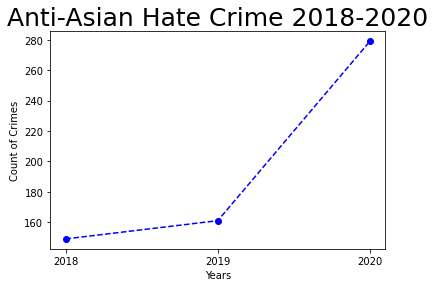

In [382]:
x_values = [2018, 2019, 2020]

fig, ax = plt.subplots() #fig: container, #ax:part of the pg that you portray data on

ax.plot(vertical_2018_2019_2020['data_year'], vertical_2018_2019_2020['value'], marker = "o", linestyle='--', color= 'blue')

# Set the x-axis label
ax.set_xlabel('Years')

plt.xticks(x_values)

# Set the y-axis label 
ax.set_ylabel('Count of Crimes')

# Set the title
ax.set_title("Anti-Asian Hate Crime 2018-2020", fontsize = 25)

#plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()

# Rise in Hate Crimes Post 9/11 

In [339]:
national_crime_1999_df = sorted_crime_df_N[sorted_crime_df_N["data_year"] == 1999]
national_crime_1999_df

,value,data_year,month_num,key
735,152,1999,0,Anti-Other Religion
736,0,1999,0,Anti-Hindu
737,303,1999,0,Anti-Asian
738,340,1999,0,Anti-Other Race/Ethnicity/Ancestry
739,0,1999,0,"Anti-Eastern Orthodox (Russian, Greek, Other)"
740,8,1999,0,Anti-Physical Disability
741,1112,1999,0,Anti-Jewish
742,14,1999,0,Anti-Heterosexual
743,0,1999,0,Anti-Female
744,0,1999,0,Anti-Gender Non-Conforming


In [334]:
#pull data from 2000; pull data from 2002


sorted_crime_df_N.reset_index(drop=True, inplace=True)
sorted_crime_df_N

national_crime_2000_df = sorted_crime_df_N[sorted_crime_df_N["data_year"] == 2000]
national_crime_2000_df
#national_crime_2000_df = sorted_crime_df_N.iloc[35:70, ]
#national_crime_2000_df



,value,data_year,month_num,key
700,38,2000,0,Anti-Arab
701,0,2000,0,Anti-Transgender
702,56,2000,0,Anti-Catholic
703,2936,2000,0,Anti-Black or African American
704,0,2000,0,Anti-Mormon
705,187,2000,0,"Anti-Lesbian, Gay, Bisexual, or Transgender (M..."
706,0,2000,0,"Anti-Eastern Orthodox (Russian, Greek, Other)"
707,280,2000,0,Anti-Asian
708,20,2000,0,Anti-Physical Disability
709,29,2000,0,Anti-Islamic (Muslim)


In [336]:
national_crime_2001_df = sorted_crime_df_N[sorted_crime_df_N["data_year"] == 2001]
national_crime_2001_df

,value,data_year,month_num,key
665,254,2001,0,Anti-Arab
666,5,2001,0,Anti-Atheism/Agnosticism
667,187,2001,0,Anti-Other Religion
668,0,2001,0,Anti-Mormon
669,499,2001,0,Anti-Islamic (Muslim)
670,15,2001,0,Anti-Heterosexual
671,8,2001,0,Multiple Bias
672,1251,2001,0,Anti-Other Race/Ethnicity/Ancestry
673,205,2001,0,Anti-Lesbian (Female)
674,36,2001,0,Anti-Catholic


In [342]:
#1999 Anti-Muslim 32
#2000 Anti-Muslim 29
#2001 Anti-Muslim 499

    

Anti_Muslim_1999 = national_crime_1999_df.iloc[14:15, ]



Anti_Muslim_2000 = national_crime_2000_df.iloc[9:10, ]



Anti_Muslim_2001 = national_crime_2001_df.iloc[4:5, ]




Anti_Muslim_1999_2000 = pd.concat([Anti_Muslim_1999, Anti_Muslim_2000], axis=0)



Anti_Muslim_1999_2000_2001 = pd.concat([Anti_Muslim_1999_2000, Anti_Muslim_2001], axis=0)
Anti_Muslim_1999_2000_2001.reset_index(drop=True, inplace=True)
Anti_Muslim_1999_2000_2001



,value,data_year,month_num,key
0,32,1999,0,Anti-Islamic (Muslim)
1,29,2000,0,Anti-Islamic (Muslim)
2,499,2001,0,Anti-Islamic (Muslim)


In [390]:
#percentage increase/decrease
Anti_Muslim_1999_2000_2001['value'].pct_change() * 100

0            NaN
1      -9.375000
2    1620.689655
Name: value, dtype: float64

In [401]:
#AVG 
#This is the average count of hate crimes against Muslims over 3 year period (1999-2001)
Anti_Muslim_1999_2000_2001[["value"]].mean()

value    186.666667
dtype: float64

In [402]:
#For skewed distribution, the median will be the best indicator of central tendency.
Anti_Muslim_1999_2000_2001[["value"]].median()

value    32.0
dtype: float64

In [403]:
#Standard deviation
statistics.pstdev(Anti_Muslim_1999_2000_2001['value'])

220.85641388819923

In [344]:
#1999 Anti-Arab 24
#2000 Anti-Arab 38
#2001 Anti-Arab 254

Anti_Arab_1999 = national_crime_1999_df.iloc[24:25, ]



Anti_Arab_2000 = national_crime_2000_df.iloc[0:1, ]



Anti_Arab_2001 = national_crime_2001_df.iloc[0:1, ]




Anti_Arab_1999_2000 = pd.concat([Anti_Arab_1999, Anti_Arab_2000], axis=0)



Anti_Arab_1999_2000_2001 = pd.concat([Anti_Arab_1999_2000, Anti_Arab_2001], axis=0)
Anti_Arab_1999_2000_2001.reset_index(drop=True, inplace=True)
Anti_Arab_1999_2000_2001



,value,data_year,month_num,key
0,24,1999,0,Anti-Arab
1,38,2000,0,Anti-Arab
2,254,2001,0,Anti-Arab


In [391]:
#percentage increase/decrease
Anti_Arab_1999_2000_2001['value'].pct_change() * 100

0           NaN
1     58.333333
2    568.421053
Name: value, dtype: float64

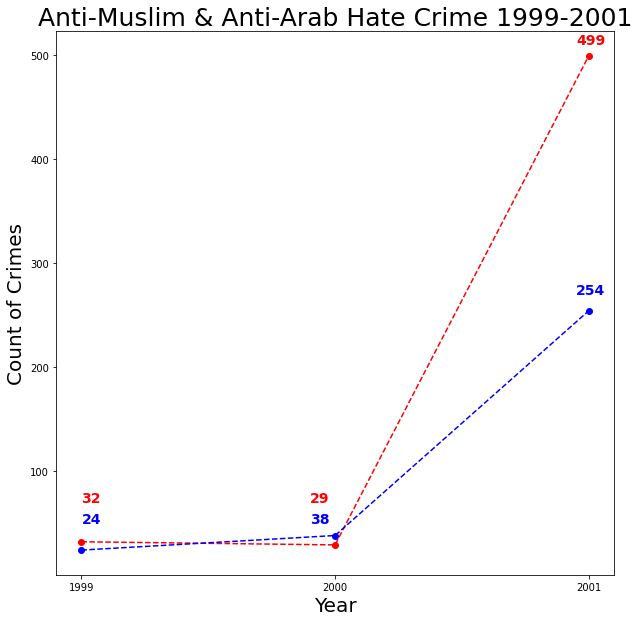

In [407]:
x_values_MA = [1999, 2000, 2001]

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(Anti_Muslim_1999_2000_2001["data_year"], Anti_Muslim_1999_2000_2001["value"],
        marker = "o", linestyle='--', color= 'red', label='Anti_Muslim')

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(Anti_Arab_1999_2000_2001["data_year"], Anti_Arab_1999_2000_2001["value"], 
        marker = "o", linestyle='--', color= 'blue', label='Anti_Arab')

# Customize the x-axis label
ax.set_xlabel("Year", fontsize = 20)
plt.xticks(x_values_MA)

# Customize the y-axis label
ax.set_ylabel("Count of Crimes", fontsize = 20)

# Add the title
ax.set_title("Anti-Muslim & Anti-Arab Hate Crime 1999-2001", fontsize = 25)

plt.text(1999, 50 ,'24', fontdict=None, fontsize = 14, fontweight ='bold', color ='blue')
plt.text(1999.90, 50,'38', fontdict=None, fontsize = 14, fontweight ='bold', color ='blue')
plt.text(2000.95, 270 ,'254', fontdict=None, fontsize = 14, fontweight ='bold', color ='blue')

plt.text(1999, 70 ,'32', fontdict=None, fontsize = 14, fontweight ='bold', color ='red')
plt.text(1999.90, 70,'29', fontdict=None, fontsize = 14, fontweight ='bold', color ='red')
plt.text(2000.95, 510 ,'499', fontdict=None, fontsize = 14, fontweight ='bold', color ='red')

# Call the show function
plt.show()

In [373]:
sorted_crime_df_N.reset_index(drop=True, inplace=True)
sorted_crime_df_N

Anti_Black_df = sorted_crime_df_N[sorted_crime_df_N["key"] == 'Anti-Black or African American']
Anti_Black_df

,value,data_year,month_num,key
21,2871,2020,0,Anti-Black or African American
50,1972,2019,0,Anti-Black or African American
102,1942,2018,0,Anti-Black or African American
106,2059,2017,0,Anti-Black or African American
154,1771,2016,0,Anti-Black or African American
176,1756,2015,0,Anti-Black or African American
241,1647,2014,0,Anti-Black or African American
267,1908,2013,0,Anti-Black or African American
285,2059,2012,0,Anti-Black or African American
340,2099,2011,0,Anti-Black or African American


In [399]:
sorted_Anti_black =Anti_Black_df.sort_values("data_year")
sorted_Anti_black

,value,data_year,month_num,key
1040,1624,1991,0,Anti-Black or African American
1007,2311,1992,0,Anti-Black or African American
971,2821,1993,0,Anti-Black or African American
917,2178,1994,0,Anti-Black or African American
889,2989,1995,0,Anti-Black or African American
874,3670,1996,0,Anti-Black or African American
827,3141,1997,0,Anti-Black or African American
780,2960,1998,0,Anti-Black or African American
748,2983,1999,0,Anti-Black or African American
703,2936,2000,0,Anti-Black or African American


In [400]:
#Percent increase/decrease (I am interested in 2020)--45.58 or 46%
sorted_Anti_black['value']. pct_change() * 100

1040          NaN
1007    42.302956
971     22.068369
917    -22.793336
889     37.235996
874     22.783540
827    -14.414169
780     -5.762496
748      0.777027
703     -1.575595
692     -0.544959
643    -14.178082
627      2.633679
563      7.192846
534     -3.191875
514     -1.423754
474      1.520334
439     10.482965
394    -22.161979
356     -4.135829
340     -4.677566
285     -1.905669
267     -7.333657
241    -13.679245
176      6.618094
154      0.854214
106     16.261999
102     -5.682370
50       1.544799
21      45.588235
Name: value, dtype: float64

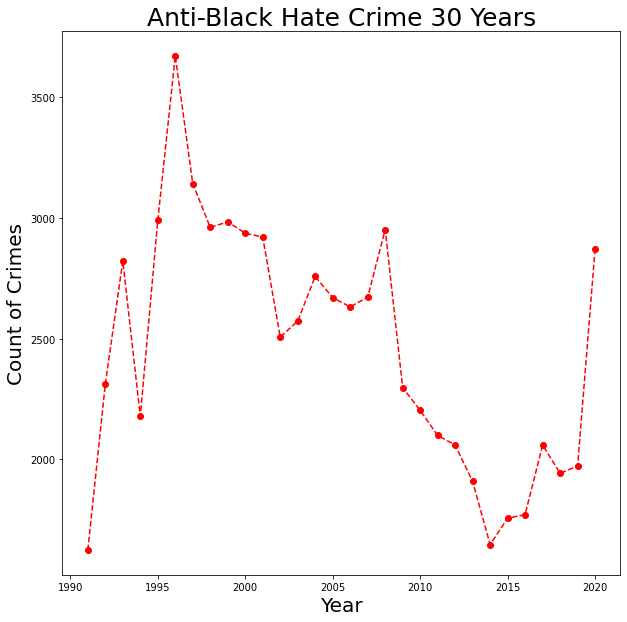

In [374]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(Anti_Black_df["data_year"], Anti_Black_df["value"],
        marker = "o", linestyle='--', color= 'red')


# Customize the x-axis label
ax.set_xlabel("Year", fontsize = 20)

# Customize the y-axis label
ax.set_ylabel("Count of Crimes", fontsize = 20)

# Add the title
ax.set_title("Anti-Black Hate Crime 30 Years", fontsize = 25)


# Call the show function
plt.show()

#“We black men have a hard enough time in our own struggle for justice. 
#The only people in this country who are asked to be nonviolent are black people.”

#"Before George Floyd, Breonna Taylor and Ahmaud Arbery, there were many more. 
#Black people have been calling out in pain and calling for help for a very long time.”